# Vanilla Recurrent Neural Network (RNN)

In [1]:
# Downloads if neccesary
import nltk
nltk.download('all') # Download if neccesary
#!pip install scikeras

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_

True

In [5]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install autogluon scikit-learn==1.5.2

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.0.9, 0.0.10, 0.0.11, 0.0.12, 0.0.13, 0.0.14, 0.0.15
ERROR: Ignored the following versions that require a different python version: 0.1.0 Requires-Python >=3.6,<3.9; 0.1.0b20210207 Requires-Python >=3.6,<3.8; 0.1.0b20210208 Requires-Python >=3.6,<3.8; 0.1.0b20210209 Requires-Python >=3.6,<3.8; 0.1.0b20210210 Requires-Python >=3.6,<3.8; 0.1.0b20210211 Requires-Python >=3.6,<3.8; 0.1.0b20210212 Requires-Python >=3.6,<3.8; 0.1.0b20210213 Requires-Python >=3.6,<3.8; 0.1.0b20210214 Requires-Python >=3.6,<3.8; 0.1.0b20210215 Requires-Python >=3.6,<3.8; 0.1.0b20210216 Requires-Python >=3.6,<3.8; 0.1.0b20210217 Requires-Python >=3.6,<3.8; 0.1.0b20210218 Requires-Python >=3.6,<3.8; 0.1.0b20210219 Requires-Python >=3.6,<3.8; 0.1.0b20210220 Requires-Python >=3.6,<3.8; 0.1.0b20210221 Requires-Python >=3.6,<3.8; 0.1.0b20210222 Requires-Python >=3.6,<3.8; 0.1.0b20210223 Requires-Python >=3.6,<3.8; 0.1.0b2

In [3]:
# We import the necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN
import warnings
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf

In [5]:
# We create the dataset for each resposibility
df_train = pd.read_excel('../data/sequences_dataset.xlsx', sheet_name='df_train', header=0)
df_val = pd.read_excel('../data/sequences_dataset.xlsx', sheet_name='df_val', header=0)
df_test = pd.read_excel('../data/sequences_dataset.xlsx', sheet_name='df_test', header=0)

In [6]:
# Separate the sequences and labels

train_seq = df_train.drop(columns=["y"]).values
train_y = df_train["y"].values

val_seq = df_val.drop(columns=["y"]).values
val_y = df_val["y"].values

test_seq = df_test.drop(columns=["y"]).values
test_y = df_test["y"].values

print("Train:", train_seq.shape, " --- ", train_y.shape)
print("Val: ", train_seq.shape, " --- ", train_y.shape)
print("Test: ", train_seq.shape, " --- ", train_y.shape)

Train: (2044, 44)  ---  (2044,)
Val:  (2044, 44)  ---  (2044,)
Test:  (2044, 44)  ---  (2044,)


In [7]:
max_words = 4000
input_length = train_seq.shape[1]
embedding_dim = 50

In [68]:
# We define a Vanilla or Simple RNN
def create_vanillaRNN(optimizer='adam', neurons=1, activation='sigmoid'):
    inputs = Input(name='inputs',shape=[input_length])
    layer = Embedding(max_words,embedding_dim)(inputs)
    layer = SimpleRNN(neurons)(layer)
    layer = Activation(activation)(layer)
    layer = Dense(neurons)(layer)
    
    
    model = Model(inputs=inputs,outputs=layer)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

model = create_vanillaRNN()

model.summary()

Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 44)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_57 (Embedding)        │ (None, 44, 50)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_57 (SimpleRNN)       │ (None, 1)              │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,054 (781.46 KB)

 Trainable params: 200,054 (781.46 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [69]:
# Train the model
history = model.fit(
    train_seq,
    train_y,
    validation_data=(val_seq, val_y),
    epochs=10,
    batch_size=128
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5064 - loss: 0.6951 - val_accuracy: 0.4840 - val_loss: 0.6948
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7520 - loss: 0.6521 - val_accuracy: 0.4909 - val_loss: 0.6937
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8268 - loss: 0.6165 - val_accuracy: 0.5046 - val_loss: 0.6929
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8513 - loss: 0.5835 - val_accuracy: 0.5205 - val_loss: 0.6943
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8635 - loss: 0.5539 - val_accuracy: 0.5023 - val_loss: 0.6989
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8865 - loss: 0.5270 - val_accuracy: 0.5137 - val_loss: 0.7035
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8943 - loss: 0.5043 - val_accuracy: 0.5183 - val_loss: 0.7121
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9002 - loss: 0.4863 - val_accuracy: 0.5434 - v

In [70]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_seq, test_y, verbose=0)
print(f"Test loss: {test_loss:.4f} — Test accuracy: {test_acc:.4f}")

Test loss: 0.7142 — Test accuracy: 0.5399


### **GridSearch Hyperparameters**

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
# Create KerasClassifier
rnn_model = KerasClassifier(build_fn=create_vanillaRNN, verbose=0)

# Define the hyperparameter grid for RNN
param_grid_rnn = {
    'model__optimizer': ['adam', 'nadam', 'adamax'],
    'model__neurons': [1],
    'model__activation': ['sigmoid', 'tanh', 'relu'],
    'epochs': [10]
}

# make the gird search
grid = GridSearchCV(estimator=rnn_model, param_grid=param_grid_rnn, scoring='accuracy', cv=3, verbose=2)

# let the gridsearch work
grid_result = grid.fit(train_seq, train_y)

# print the best model c:
print(f"Best Accuracy: {grid_result.best_score_:.4f}")
print(f"Best Params: {grid_result.best_params_}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END epochs=10, model__activation=sigmoid, model__neurons=1, model__optimizer=adam; total time=  10.5s
[CV] END epochs=10, model__activation=sigmoid, model__neurons=1, model__optimizer=adam; total time=   8.4s
[CV] END epochs=10, model__activation=sigmoid, model__neurons=1, model__optimizer=adam; total time=   8.7s
[CV] END epochs=10, model__activation=sigmoid, model__neurons=1, model__optimizer=nadam; total time=   9.4s
[CV] END epochs=10, model__activation=sigmoid, model__neurons=1, model__optimizer=nadam; total time=  10.2s
[CV] END epochs=10, model__activation=sigmoid, model__neurons=1, model__optimizer=nadam; total time=   8.1s
[CV] END epochs=10, model__activation=sigmoid, model__neurons=1, model__optimizer=adamax; total time=   9.6s
[CV] END epochs=10, model__activation=sigmoid, model__neurons=1, model__optimizer=adamax; total time=   9.4s
[CV] END epochs=10, model__activation=sigmoid, model__neurons=1, model__optim

In [71]:
# Now we'll remake the rnn model
best_model = create_vanillaRNN(
    optimizer='adam',
    neurons=1,
    activation='sigmoid'
)

# Retrain the model to see the results
history = best_model.fit(
    train_seq,
    train_y,
    validation_data=(val_seq, val_y),
    epochs=10,
    batch_size=128,
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5597 - loss: 0.6913 - val_accuracy: 0.6735 - val_loss: 0.6527
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7568 - loss: 0.6174 - val_accuracy: 0.7260 - val_loss: 0.6186
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8102 - loss: 0.5508 - val_accuracy: 0.7260 - val_loss: 0.5925
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8444 - loss: 0.4945 - val_accuracy: 0.7580 - val_loss: 0.5700
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8938 - loss: 0.4637 - val_accuracy: 0.7694 - val_loss: 0.5551
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9026 - loss: 0.4318 - val_accuracy: 0.7626 - val_loss: 0.5474
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9154 - loss: 0.4055 - val_accuracy: 0.7603 - val_loss: 0.5426
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9261 - loss: 0.3831 - val_accuracy: 0.7648 - v

In [73]:
# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(test_seq, test_y, verbose=0)
print(f"Test loss: {test_loss:.4f} — Test accuracy: {test_acc:.4f}")

Test loss: 0.5213 — Test accuracy: 0.7836


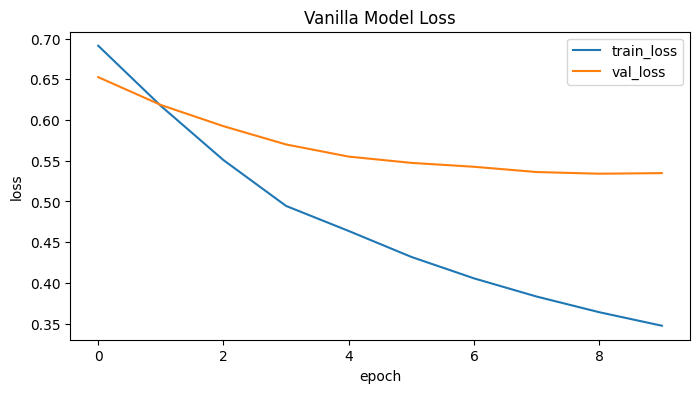

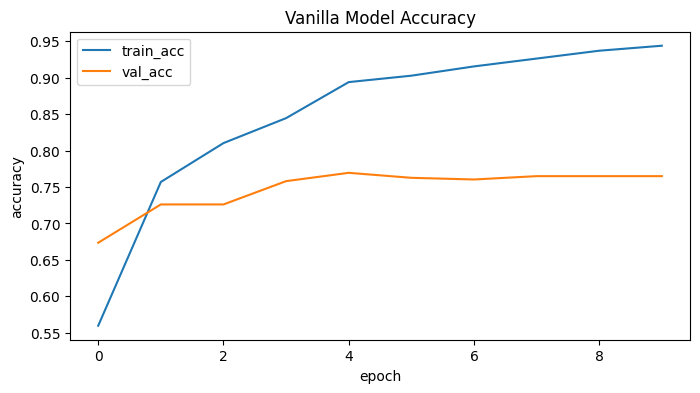

In [77]:
# Plot the RNN Model result
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Vanilla Model Loss')
plt.show()

# Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Vanilla Model Accuracy')
plt.show()


In [75]:
# Evaluate trained model on the test set using sklearn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Change the probabilities to the binary predictions
probs = best_model.predict(test_seq)
y_pred = (probs.ravel() >= 0.5).astype(int)

# Make the metrics
acc = accuracy_score(test_y, y_pred)
prec = precision_score(test_y, y_pred, zero_division=0)
rec = recall_score(test_y, y_pred, zero_division=0)
f1 = f1_score(test_y, y_pred, zero_division=0)
kappa = cohen_kappa_score(test_y, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Cohen kappa: {kappa:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy:  0.7836
Precision: 0.7689
Recall:    0.8206
F1-score:  0.7939
Cohen kappa: 0.5666
